In [26]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate




In [3]:
## Importing the training and test dataset

train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_df.head()

,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,258868,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Male,21,...,1~3,4~8,4~8,never,1,1,0,0,1,1
1,318369,Work,Alone,Sunny,80,7AM,Restaurant(<20),2h,Male,21,...,1~3,4~8,1~3,less1,1,0,0,1,0,0
2,320906,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,21,...,gt8,4~8,1~3,1~3,1,1,0,0,1,0
3,412393,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,...,less1,4~8,1~3,never,1,1,1,0,1,0
4,290854,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,31,...,less1,4~8,less1,never,1,1,0,0,1,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  object
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  car                   84 non-null   

In [7]:
## Finding out the null values
train_df.isna().sum()


customer_id                 0
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     10063
Bar                        88
CoffeeHouse               172
CarryAway                 122
RestaurantLessThan20       97
Restaurant20To50          148
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [8]:
test_df.isna().sum()

customer_id                0
destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     2513
Bar                       19
CoffeeHouse               45
CarryAway                 29
RestaurantLessThan20      33
Restaurant20To50          41
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
dtype: int64

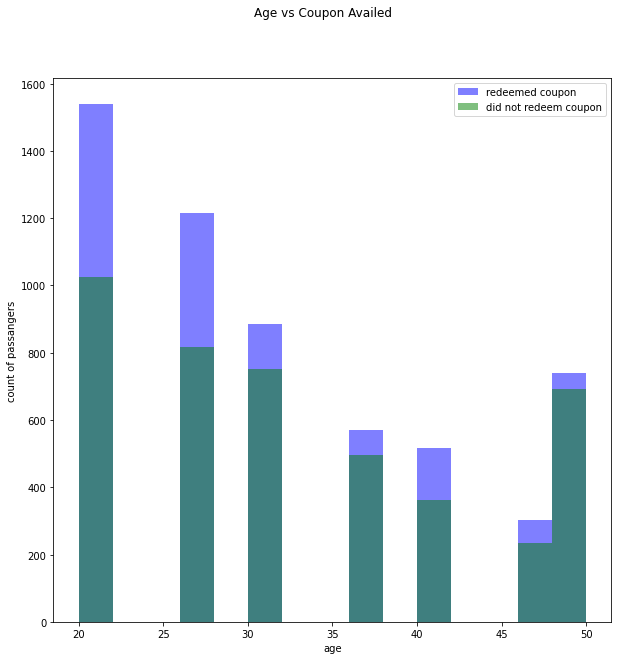

In [40]:
fig, ax = plt.subplots(figsize=(10,10))

x_1 = train_df[train_df['Y']==1]['age']
x_0 = train_df[train_df['Y']==0]['age']

plt.hist(x_1, bins=15, alpha=0.5, color='blue', label='redeemed coupon')
plt.hist(x_0, bins=15, alpha=0.5, color='green', label='did not redeem coupon')


plt.xlabel("age")
plt.ylabel("count of passangers")

fig.suptitle("Age vs Coupon Availed")
plt.legend()
plt.show()

In [9]:
## Starting Data Cleaning.


def clean_time_expiration_age_gender(df):

## Cleaning Time column  
  df['time'] = df['time'].astype("string")
  print(f"Unique values for Time column {df['time'].unique()}")

  # df['time'] = df['time'].map(lambda x : int(x[:-2])+12 if x[-2:] == 'PM' else int(x[:-2]))
  # print(f"Unique values for Time column after cleaning {df['time'].unique()}")



## Cleaning Expiration column
  df['expiration']=df['expiration'].apply(lambda x: 0.0834 if x=='2h' else 1)

## Cleaning age column
  df['age'] = df['age'].apply(lambda x: 50 if x=='50plus' else(20 if x=='below21' else x)) 
  df['age'] = df['age'].astype("int")

## Cleaning gender column
  df['gender'] = df['gender'].map(lambda x: 1 if x=='Male' else 0)
  df['gender'] = df['gender'].astype("int")

  return df
  

train_df = clean_time_expiration_age_gender(train_df)
test_df = clean_time_expiration_age_gender(test_df)

  # Time converting to Integer values by using date time format
train_df['time'] = pd.to_datetime(train_df['time'],format = '%I%p').dt.hour
test_df['time'] = pd.to_datetime(test_df['time'],format = '%I%p').dt.hour



Unique values for Time column <StringArray>
['6PM', '7AM', '10AM', '10PM', '2PM']
Length: 5, dtype: string
Unique values for Time column <StringArray>
['6PM', '10AM', '7AM', '10PM', '2PM']
Length: 5, dtype: string


In [10]:
## Imputing Nan to values for below columns
#Bar                   
#CoffeeHouse          
#CarryAway            
#RestaurantLessThan20  
#Restaurant20To50  

#Encoding categorical columns

def fill_missing_values(df, cols_list):    
    for i in cols_list:
        # print(f"Before encoding missing values --> {df[i].isna().sum()}")
        df[i] = df[i].fillna(df[i].mode()[0])
        # print(f"After encoding missing values --> {df[i].isna().sum()}")
    return df

train_df = fill_missing_values(train_df, ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])
train_df.isna().sum().sum() #checking null values in dataframe

test_df = fill_missing_values(test_df, ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])
test_df.isna().sum().sum() #checking null values in dataframe



2513

In [11]:
# Encoding following columns:
#Bar                   
#CoffeeHouse          
#CarryAway            
#RestaurantLessThan20  
#Restaurant20To50  

def encode_ordinal(df,cols):
  val = {'never':0,
         'less1':1,
         '1~3':2,
         '4~8':3,
         'gt8':4}

  for i in cols:
    df[i]=df[i].map(val)

  return df

train_df = encode_ordinal(train_df, ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])
test_df = encode_ordinal(test_df, ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])

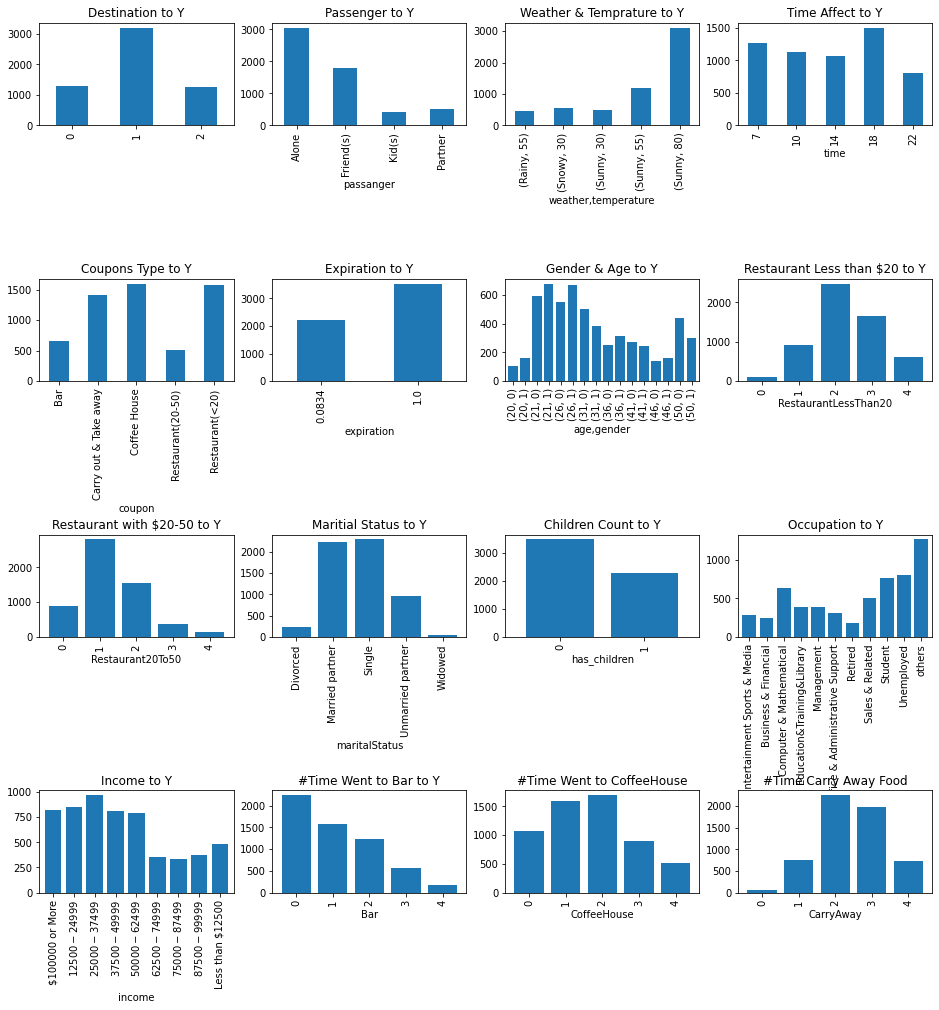

In [38]:
##Creating Pivot tables for different columns combination

pv1 = train_df.pivot_table(index = ['destination'], values = ['Y'], aggfunc = 'sum')
pv2 = train_df.pivot_table(index = ['passanger'], values = ['Y'], aggfunc = 'sum')
pv3 = train_df.pivot_table(index = [ 'weather', 'temperature'], values = ['Y'], aggfunc = 'sum')
pv4 = train_df.pivot_table(index = ['RestaurantLessThan20'], values = ['Y'], aggfunc = 'sum')
pv5 = train_df.pivot_table(index = ['time'], values = ['Y'], aggfunc = 'sum')
pv6 = train_df.pivot_table(index = ['coupon'], values = ['Y'], aggfunc = 'sum')
pv7 = train_df.pivot_table(index = [ 'expiration'], values = ['Y'], aggfunc = 'sum')
pv8 = train_df.pivot_table(index = ['age','gender'], values = ['Y'], aggfunc = 'sum')
pv9 = train_df.pivot_table(index = ['Restaurant20To50'], values = ['Y'], aggfunc = 'sum')
pv10 = train_df.pivot_table(index = ['maritalStatus'], values = ['Y'], aggfunc = 'sum')
pv11 = train_df.pivot_table(index = ['has_children'], values = ['Y'], aggfunc = 'sum')
pv12= train_df.pivot_table(index = ['occupation'], values = ['Y'], aggfunc = 'sum')
pv13 = train_df.pivot_table(index = ['income'], values = ['Y'], aggfunc = 'sum')
pv14 = train_df.pivot_table(index = ['Bar'], values = ['Y'], aggfunc = 'sum')
pv15 = train_df.pivot_table(index = ['CoffeeHouse'], values = ['Y'], aggfunc = 'sum')
pv16 = train_df.pivot_table(index = ['CarryAway'], values = ['Y'], aggfunc = 'sum')

fig, ax = plt.subplots(figsize=(16,16), nrows = 4, ncols = 4)
pv1.plot(ax = ax[0,0], kind = 'bar', title = 'Destination to Y', legend = False, width = .5, grid = False, use_index=False)
pv2.plot(ax = ax[0,1], kind = 'bar', title = 'Passenger to Y', legend = False, width = .5, grid = False)
pv3.plot(ax = ax[0,2], kind = 'bar', title = 'Weather & Temprature to Y', legend = False, width = .5, grid = False)
pv5.plot(ax = ax[0,3], kind = 'bar', title = 'Time Affect to Y', legend = False, width = .5, grid = False)
pv6.plot(ax = ax[1,0], kind = 'bar', title = 'Coupons Type to Y', legend = False, width = .5, grid = False)
pv7.plot(ax = ax[1,1], kind = 'bar', title = 'Expiration to Y', legend = False, width = .5, grid = False)
pv8.plot(ax = ax[1,2], kind = 'bar', title = 'Gender & Age to Y', legend = False, width = .8, grid = False)
pv9.plot(ax = ax[2,0], kind = 'bar', title = 'Restaurant with $20-50 to Y', legend = False, width = .8, grid = False)
pv4.plot(ax = ax[1,3], kind = 'bar', title ='Restaurant Less than $20 to Y', legend = False, width = .8, grid = False)
pv10.plot(ax = ax[2,1], kind = 'bar', title = 'Maritial Status to Y', legend = False, width = .8, grid = False)
pv11.plot(ax = ax[2,2], kind = 'bar', title = 'Children Count to Y', legend = False, width = .8, grid = False)
pv12.plot(ax = ax[2,3], kind = 'bar', title = 'Occupation to Y', legend = False, width = .8, grid = False)
pv13.plot(ax = ax[3,0], kind = 'bar', title = 'Income to Y', legend = False, width = .8, grid = False)
pv14.plot(ax = ax[3,1], kind = 'bar', title = '#Time Went to Bar to Y', legend = False, width = .8, grid = False)
pv15.plot(ax = ax[3,2], kind = 'bar', title = '#Time Went to CoffeeHouse', legend = False, width = .8, grid = False)
pv16.plot(ax = ax[3,3], kind = 'bar', title = '#Time Carry Away Food', legend = False, width = .8, grid = False)

plt.subplots_adjust(hspace=1.5)
plt.show()

#Inferences from above graphs:

• No urgent place have higher footfall compare to other destinations • Alone & Friends have higher tendency to go mall • Sunny weather with extreme temperature is preferable by the customers to visit mall • No specific variance observed during the whole day on foot fall. • Restaurant(<20) coupons have higher redemption • We have to increase the expiration period to 24 hours if we want customer to redeem • People with Age Group 21 - 31 years have higher foot fall due to coupons without any gender variance • Customer opted more where the average bill value is less than 20 dollar. • Wherever bill value cross 20 dollar, very less chance that customer will opt for redemption • Single & Married partners shows higher interest with these coupons • Though we don’t have much data for children accompany, still customers without kids will visit more • Primary customer segments for this benefit are Student & Unemployed • Income segment below 65K should be targeted. • Carry Away & Coffee House coupons were more successful than Bar coupons

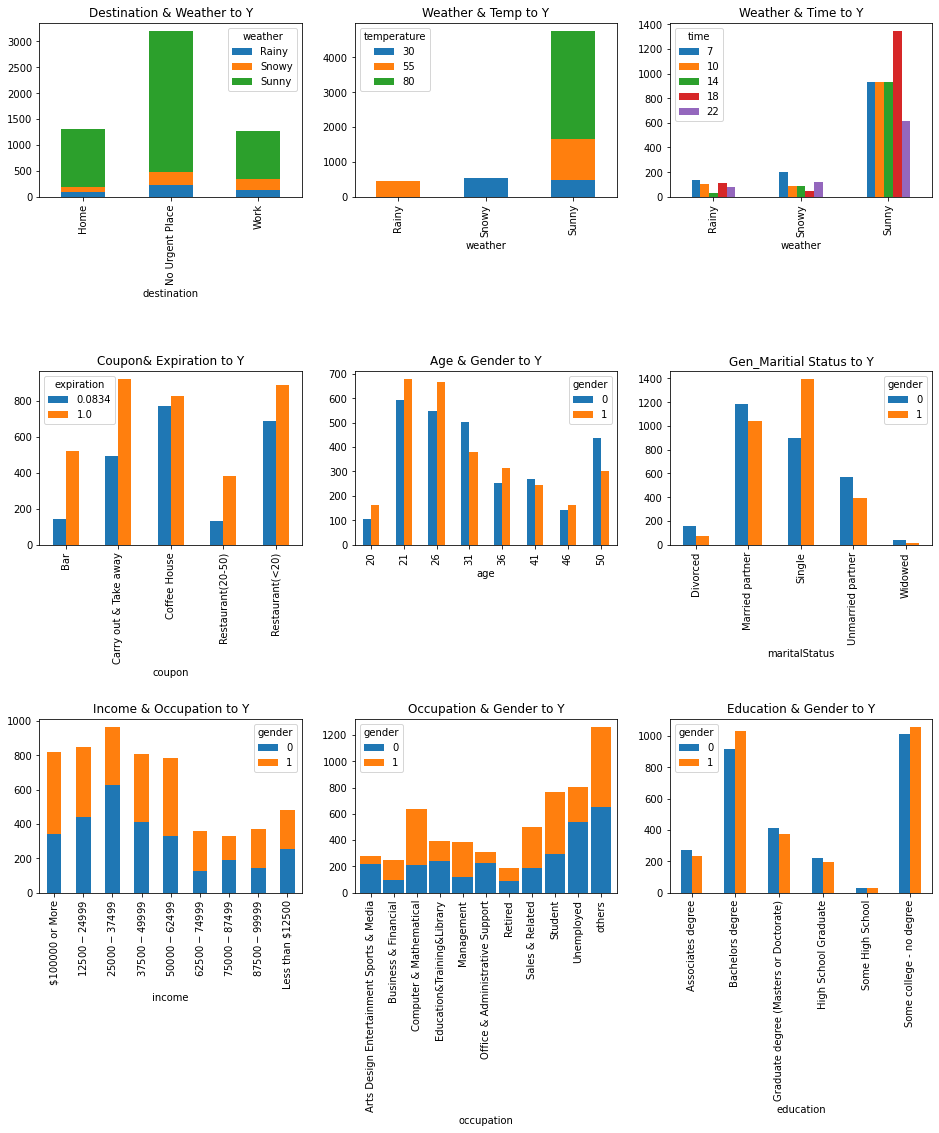

In [39]:
# Bi-Variant Analysis

fig, ax = plt.subplots(figsize=(16,16), nrows = 3, ncols = 3)
Dest_Weat = pd.crosstab(train_df.destination,  [train_df.weather], values = train_df.Y, aggfunc = 'sum')
Weat_Temp = pd.crosstab(train_df.weather,  [train_df.temperature], values = train_df.Y, aggfunc = 'sum')
Weat_Time = pd.crosstab(train_df.weather,  [train_df.time], values = train_df.Y, aggfunc = 'sum')
Coupon_Expiration = pd.crosstab(train_df.coupon,  [train_df.expiration], values = train_df.Y, aggfunc = 'sum')
Age_Gender = pd.crosstab(train_df.age,  [train_df.gender], values = train_df.Y, aggfunc = 'sum')
Gen_Maritial_Status = pd.crosstab(train_df.maritalStatus,  [train_df.gender], values = train_df.Y, aggfunc = 'sum')
Income_Gender = pd.crosstab(train_df.income,  [train_df.gender], values = train_df.Y, aggfunc = 'sum')
Occupation_Gender = pd.crosstab(train_df.occupation,  [train_df.gender], values = train_df.Y, aggfunc = 'sum')
Education_Gender = pd.crosstab(train_df.education,  [train_df.gender], values = train_df.Y, aggfunc = 'sum')

Dest_Weat.plot(ax=ax[0,0], kind='bar', title = 'Destination & Weather to Y',stacked = True,grid=False)
Weat_Temp.plot(ax=ax[0,1], kind='bar', title = 'Weather & Temp to Y', stacked = True,grid=False)
Weat_Time.plot(ax=ax[0,2], kind='bar',title = 'Weather & Time to Y',grid=False)
Coupon_Expiration.plot(ax=ax[1,0], kind='bar',title = 'Coupon& Expiration to Y',grid=False)
Age_Gender.plot(ax=ax[1,1], kind='bar',title = 'Age & Gender to Y',grid=False)
Gen_Maritial_Status.plot(ax=ax[1,2], kind='bar',title = 'Gen_Maritial Status to Y',grid=False)
Income_Gender.plot(ax=ax[2,0], kind='bar',title = 'Income & Occupation to Y',grid=False, stacked = True)
Occupation_Gender.plot(ax=ax[2,1], kind='bar',title = 'Occupation & Gender to Y',grid=False, stacked = True, width = .9)
Education_Gender.plot(ax=ax[2,2], kind='bar',title = 'Education & Gender to Y',grid=False)

plt.subplots_adjust(hspace=1)
plt.show()


Inferences from above graph:


* No Urgent places on sunny days have high foot fall
* Irrespective of any Temperature, Sunny days will have always high volume in mall
* People prefer to visit during evening time on sunny Days more than other intervals.
* Mall should focus in coupons with 24 hours of expiration related to Coffee House, Take Aways & all restaurants with average bill value of less than 20 dollar.
* Single Male with age group 21 to 26 years opt for these offers more.
* Unemployed Female & Male students can be targeted.

In [14]:
# Occupation feature has more categories , boxplot will tell the outliers , draw the boxplot before and after applying below snippet, skewness needs to be checked
# weather = train_df[train_df['Y']==1]['occupation'].value_counts() - Try to apply this for all feature and do skewness check , box plot , kernel density estimation KDE plot

outlier_in_occupation = ['Unemployed','Student','Computer & Mathematical','Sales & Related','Education&Training&Library',
                'Management','Office & Administrative Support','Arts Design Entertainment Sports & Media',
                'Business & Financial','Retired']
train_df['occupation'] = train_df['occupation'].apply(lambda v: 'others' if v not in outlier_in_occupation else v)
test_df['occupation'] = test_df['occupation'].apply(lambda v: 'others' if v not in outlier_in_occupation else v)

In [15]:
#one hot encoding
def oneHotEncoding(df,cols):
    return pd.get_dummies(df, columns=cols)
    
columns = ["destination","passanger" ,"weather","maritalStatus","occupation","coupon","education"]
train_df_encoded = oneHotEncoding(train_df,columns)
test_df_encoded = oneHotEncoding(test_df,columns)



In [16]:
#labelling income column
def encode_income(df1,income_map):
  df1.income = df1.income.map(income_map)
  return df1

income_map = {
            'Less than $12500': 0,
            '$12500 - $24999': 1,
            '$25000 - $37499': 2,
            '$37500 - $49999': 3,
            '$50000 - $62499': 4,
            '$62500 - $74999': 5,
            '$75000 - $87499': 6,
            '$87500 - $99999': 7,
            '$100000 or More': 8}
train_df_encoded = encode_income(train_df_encoded.copy(),income_map)
test_df_encoded = encode_income(test_df_encoded.copy(),income_map)

In [17]:
#Drop not needed columns
train_df_encoded.drop(columns=['car','direction_opp','toCoupon_GEQ5min','customer_id','temperature','time','weather_Rainy','weather_Snowy','weather_Sunny'],inplace=True)
test_df_encoded.drop(columns=['car','direction_opp','toCoupon_GEQ5min','customer_id','temperature','time','weather_Rainy','weather_Snowy','weather_Sunny'],inplace=True)

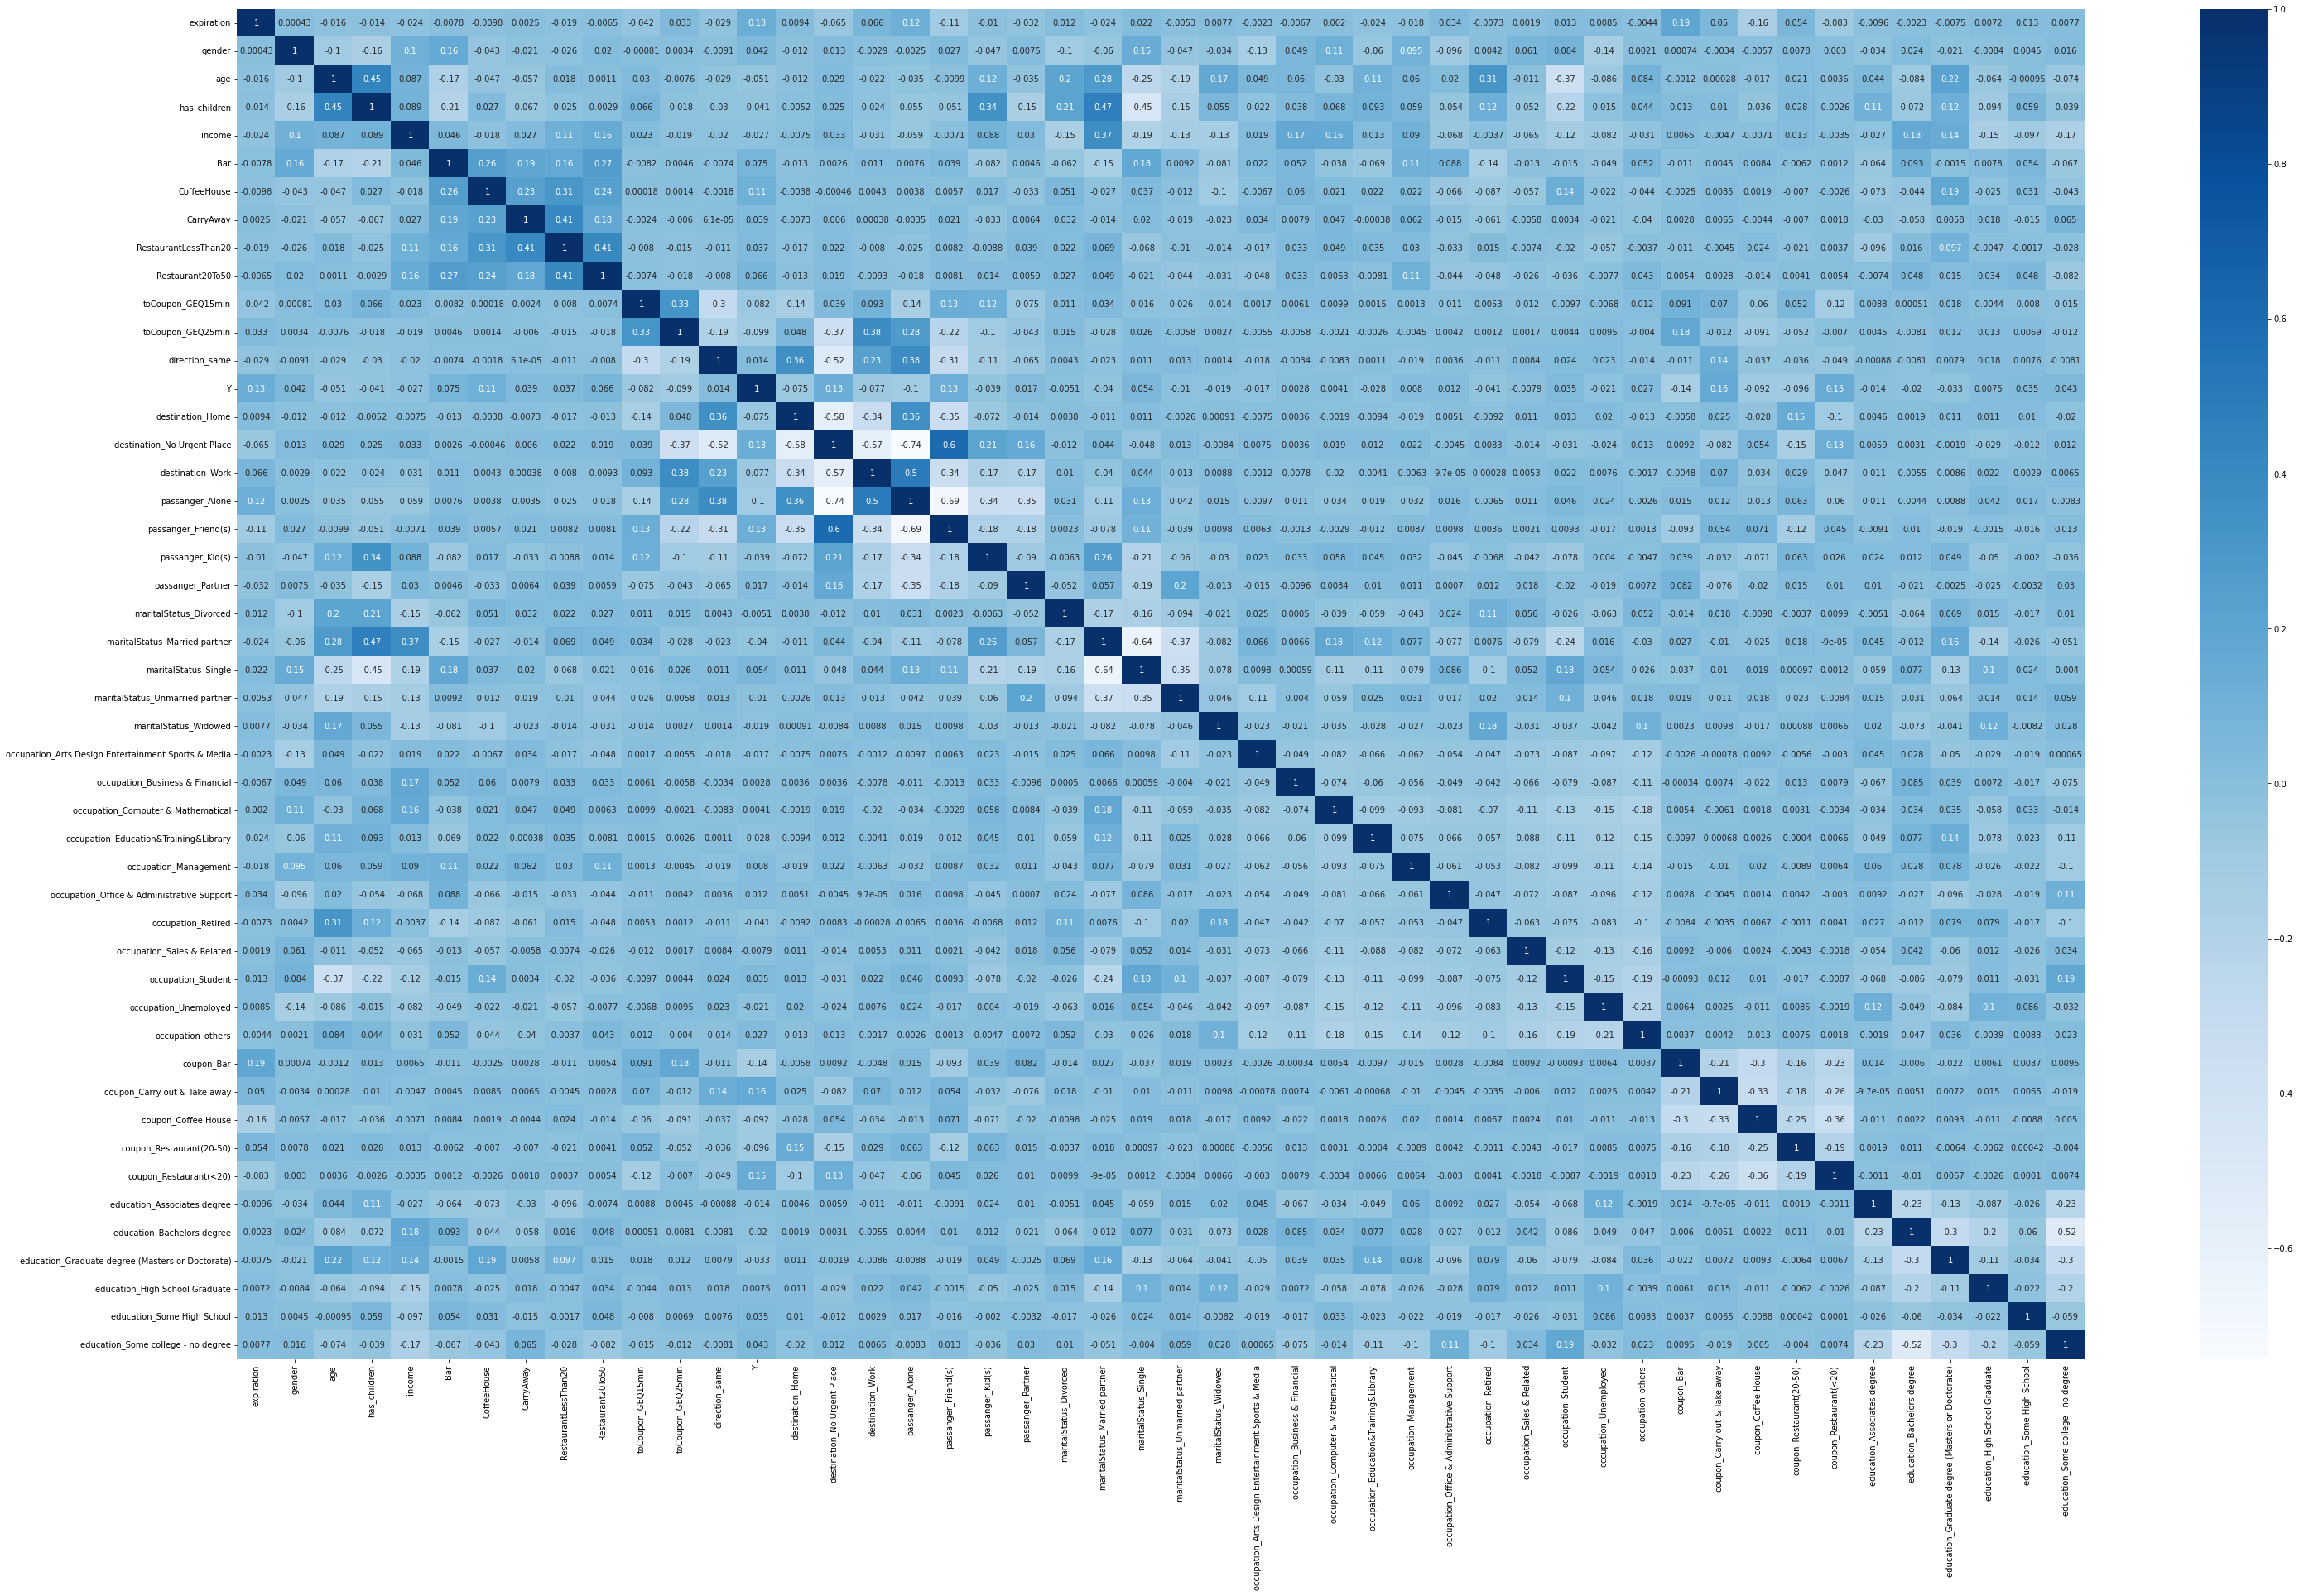

In [18]:
#Making a copy of original data in order to remove Id columns from analysis

df_corr = train_df_encoded.copy()
#df_corr.drop(['customer_id', 'toCoupon_GEQ5min','direction_opp'], axis=1, inplace=True)

f, ax = plt.subplots(figsize=(50, 30))
ax = sns.heatmap(df_corr.corr(), cbar=True, cmap='Blues',annot=True)

plt.show()


In [19]:
# Identifying if any feature is highly correlated with the target variable.

corr_matrix = df_corr.corrwith(df_corr['Y']).abs()

pd.set_option('max_rows',500)
print(corr_matrix>0.7)

expiration                                             False
gender                                                 False
age                                                    False
has_children                                           False
income                                                 False
Bar                                                    False
CoffeeHouse                                            False
CarryAway                                              False
RestaurantLessThan20                                   False
Restaurant20To50                                       False
toCoupon_GEQ15min                                      False
toCoupon_GEQ25min                                      False
direction_same                                         False
Y                                                       True
destination_Home                                       False
destination_No Urgent Place                            False
destination_Work        

In [20]:
#checking correlation between independent variables

df_corr = df_corr.corr(method='pearson').abs()
corr_val = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=False)
corr_val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


destination_No Urgent Place    passanger_Alone                               0.743183
passanger_Alone                passanger_Friend(s)                           0.691588
maritalStatus_Married partner  maritalStatus_Single                          0.636110
destination_No Urgent Place    passanger_Friend(s)                           0.601857
destination_Home               destination_No Urgent Place                   0.579435
                                                                               ...   
coupon_Restaurant(<20)         education_Some High School                    0.000104
destination_Work               occupation_Office & Administrative Support    0.000097
coupon_Carry out & Take away   education_Associates degree                   0.000097
maritalStatus_Married partner  coupon_Restaurant(<20)                        0.000090
CarryAway                      direction_same                                0.000061
Length: 1128, dtype: float64

# Model tried for the analysis


1) Logisitic Regression

In [23]:
train_df_encoded_copy = train_df_encoded.copy()
y = train_df_encoded_copy.pop('Y')
X = train_df_encoded_copy

from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(X.values)
X = pd.DataFrame(scaled_features, columns=X.columns)



X_test = test_df_encoded.copy()
scaled_features = StandardScaler().fit_transform(X_test.values)
X_test = pd.DataFrame(scaled_features, columns=X_test.columns)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

model = LogisticRegression(solver='liblinear', C =25.0, random_state=0)
cross_score = cross_val_score(model,X,y,cv=5,scoring='accuracy')
avg_score = np.mean(cross_score)
print("The accuracy score of the model using logistic regression is: ",avg_score)

model.fit(X, y)


#p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)


The accuracy score of the model using logistic regression is:  0.6744851379140396


In [24]:
# predict test dataset
y_pred1 = model.predict(X_test)


2) Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[5,10,15,20,25],
    "learning_rate":[0.01,0.1,1,10,100]
}


cv = RandomizedSearchCV(gbc,parameters,cv=5)
cv.fit(X,y)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'n_estimators': [5, 50, 250, 500]})

In [29]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [30]:
display(cv)

Best parameters are: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 1}


0.737 + or -0.007 for the {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 1}
0.686 + or -0.007 for the {'n_estimators': 50, 'max_depth': 25, 'learning_rate': 0.1}
0.393 + or -0.057 for the {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 100}
0.568 + or -0.0 for the {'n_estimators': 5, 'max_depth': 15, 'learning_rate': 0.01}
0.568 + or -0.0 for the {'n_estimators': 5, 'max_depth': 25, 'learning_rate': 0.01}
0.695 + or -0.011 for the {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.01}
0.549 + or -0.013 for the {'n_estimators': 250, 'max_depth': 10, 'learning_rate': 10}
0.671 + or -0.016 for the {'n_estimators': 500, 'max_depth': 20, 'learning_rate': 100}
0.672 + or -0.006 for the {'n_estimators': 50, 'max_depth': 25, 'learning_rate': 100}
0.652 + or -0.021 for the {'n_estimators': 250, 'max_depth': 20, 'learning_rate': 100}


In [32]:
gbc = GradientBoostingClassifier(learning_rate = 1, max_depth = 5, n_estimators = 250, random_state=42)
cross_score_rf = cross_val_score(gbc,X,y,cv=5,scoring='accuracy')
print(cross_score_rf.mean())

gbc.fit(X,y)

0.7430773974415313


GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=250,
                           random_state=42)

4) Random Forest Classifier (Final Model)


In [35]:
ft=RandomForestClassifier()
#Hyper tuning the parameters to find the relevant parameter

# RandomizedSearch
params = {'n_estimators':list(range(1,150))}
rs_ft = RandomizedSearchCV(estimator=ft,param_distributions=params,cv=5, return_train_score=True)
rs_ft.fit(X,y)
X_rscv_results = pd.DataFrame(rs_ft.cv_results_)
X_rscv_results.sort_values(by='mean_test_score', ascending=False)[['param_n_estimators','mean_test_score']].head()



,param_n_estimators,mean_test_score
3,96,0.758746
7,131,0.758550
2,85,0.756676
8,68,0.755691
9,77,0.754509


In [37]:

# GridSearch
params = {'n_estimators':list(range(2,120))}

ft = RandomForestClassifier()
gs_ft = GridSearchCV(estimator=ft,param_grid=params,cv=5, return_train_score=True)
gs_ft.fit(X,y)
X_cv_results = pd.DataFrame(gs_ft.cv_results_)
X_cv_results.sort_values(by='mean_test_score', ascending=False)[['param_n_estimators','mean_test_score']].head()



,param_n_estimators,mean_test_score
100,102,0.760224
106,108,0.759928
105,107,0.759732
111,113,0.759436
93,95,0.759239


In [36]:
rf_model = RandomForestClassifier(n_estimators=140,random_state=80,max_depth = 25) 
cross_score_rf = cross_val_score(rf_model,X,y,cv=5,scoring='accuracy')
print(cross_score_rf.mean())

rf_model.fit(X,y)
y_pred_rf = rf_model.predict(X_test)

0.7607172355524694


In [ ]:
df_sub2 = pd.DataFrame(np.hstack((test_df[['customer_id']],y_pred_rf.reshape(-1,1))),columns=['customer_id','Y'])
df_sub2.to_csv('sample_submission2_rf.csv',index=False)
